In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
# Load the dataframe
data = pd.read_csv('Preprocessed_data_1.csv')

# Create a copy of the dataframe
pre_df = data.copy()

# Handling missing values in the 'text' column
pre_df['text'] = pre_df['text'].fillna('')

# Drop rows with empty strings in the 'text' column
pre_df = pre_df[pre_df['text'] != '']

# Reset the index of the DataFrame
pre_df.reset_index(drop=True, inplace=True)

In [3]:
pre_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55876 entries, 0 to 55875
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       55876 non-null  int64 
 1   text             55876 non-null  object
 2   original_text    55876 non-null  object
 3   listed_emotions  55876 non-null  object
 4   emotion_count    55876 non-null  int64 
 5   labels           55876 non-null  object
 6   encoded_labels   55876 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.0+ MB


In [4]:
# Tokenization
tokenizer = Tokenizer()
texts = pre_df['text']
tokenizer.fit_on_texts(texts)  # 'texts' represents the text data
num_words = len(tokenizer.word_index) + 1  # Add 1 for the reserved 0 index
embedding_dim = 100
sequence_lengths = [len(tokens) for tokens in tokenizer.texts_to_sequences(texts)]
max_sequence_length = max(sequence_lengths)
num_classes = len(set(pre_df['labels']))

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [6]:
# Vectorization
vectorizer = TfidfVectorizer()
text_vectorized = vectorizer.fit_transform(pre_df['text'].values.astype('U'))
svd = TruncatedSVD(n_components=100)
text_vectorized_svd = svd.fit_transform(text_vectorized)
vectorized_df = pd.DataFrame(text_vectorized_svd)
pre_df_vectorized = pd.concat([pre_df, vectorized_df], axis=1)

In [7]:
# Split the data
X = text_vectorized_svd
y = pre_df['encoded_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [9]:
# One-hot encode the target variable
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

In [10]:
# Define the model architecture
model = Sequential()
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, input_shape=(1, X_train.shape[2])))
model.add(Dense(units=num_classes, activation='softmax'))

e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:

# Train the model
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded),
          callbacks=[early_stopping])

Epoch 1/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4514 - loss: 1.0409 - val_accuracy: 0.4991 - val_loss: 0.9711
Epoch 2/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4774 - loss: 0.9928 - val_accuracy: 0.4959 - val_loss: 0.9668
Epoch 3/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4847 - loss: 0.9838 - val_accuracy: 0.4979 - val_loss: 0.9653
Epoch 4/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4841 - loss: 0.9818 - val_accuracy: 0.4948 - val_loss: 0.9639
Epoch 5/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4803 - loss: 0.9830 - val_accuracy: 0.4949 - val_loss: 0.9639
Epoch 6/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4841 - loss: 0.9850 - val_accuracy: 0.4962 - val_loss: 0.9635
Epoch 7/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4831 - loss: 0.9845 - val_accuracy: 0.4965 - val_loss: 0.9602
Epoch 8/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4836 - loss: 0.9838 - 

In [13]:
y_pred = model.predict(X_test)  
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
              precision    recall  f1-score   support

           0       0.48      0.27      0.34      3094
           1       0.38      0.16      0.22      2994
           2       0.52      0.84      0.64      5088

    accuracy                           0.50     11176
   macro avg       0.46      0.42      0.40     11176
weighted avg       0.47      0.50      0.45     11176



## Fine Tuning the model


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the model architecture with improvements
model = Sequential()

# Bidirectional LSTM with Dropout and Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second LSTM layer for feature extraction
model.add(Bidirectional(LSTM(units=64, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=40,
    batch_size=64,  # Larger batch size can stabilize training
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels))


Epoch 1/40


e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4556 - loss: 1.0265 - val_accuracy: 0.5120 - val_loss: 0.9769 - learning_rate: 0.0010
Epoch 2/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4881 - loss: 0.9934 - val_accuracy: 0.5062 - val_loss: 0.9622 - learning_rate: 0.0010
Epoch 3/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4923 - loss: 0.9827 - val_accuracy: 0.5098 - val_loss: 0.9601 - learning_rate: 0.0010
Epoch 4/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5008 - loss: 0.9823 - val_accuracy: 0.5106 - val_loss: 0.9578 - learning_rate: 0.0010
Epoch 5/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4957 - loss: 0.9810 - val_accuracy: 0.5101 - val_loss: 0.9595 - learning_rate: 0.0010
Epoch 6/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5078 - loss: 0.9700 - val_accuracy: 0.5107 - val_loss: 0.9568 - learning_rate: 0.0010
Epoch 7/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5023 - loss: 0.9740 - val_accurac

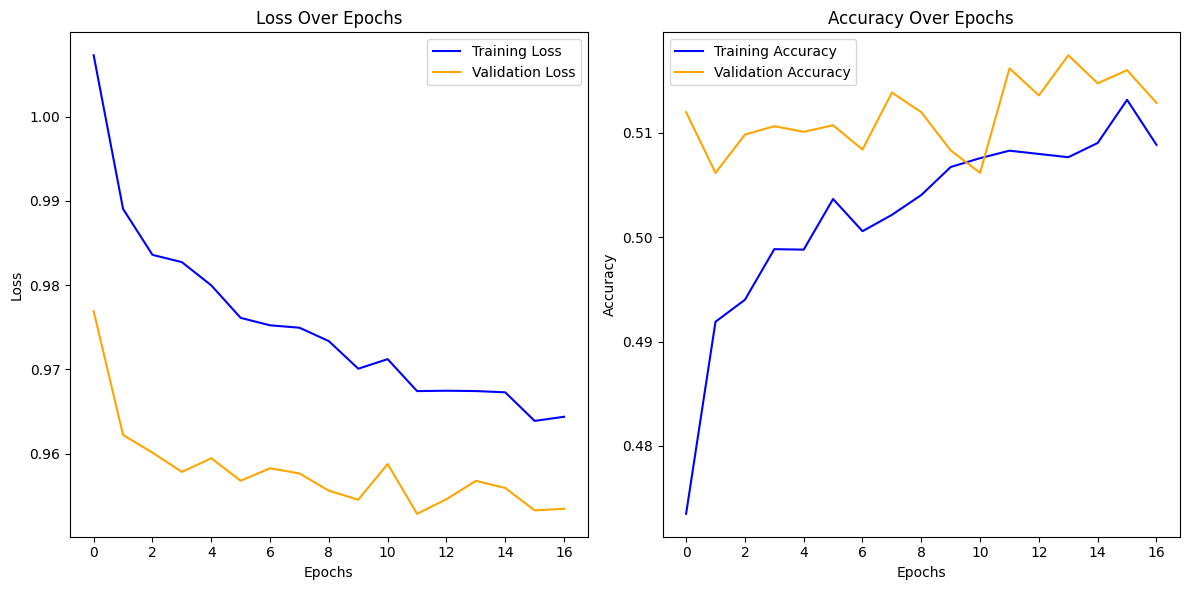

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the LSTM + GRU model
model = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second GRU layer
model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


Epoch 1/30


e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4340 - loss: 1.0413 - val_accuracy: 0.4905 - val_loss: 0.9856 - learning_rate: 0.0010
Epoch 2/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4804 - loss: 0.9983 - val_accuracy: 0.5067 - val_loss: 0.9643 - learning_rate: 0.0010
Epoch 3/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4873 - loss: 0.9875 - val_accuracy: 0.5101 - val_loss: 0.9624 - learning_rate: 0.0010
Epoch 4/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4928 - loss: 0.9820 - val_accuracy: 0.5087 - val_loss: 0.9646 - learning_rate: 0.0010
Epoch 5/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4985 - loss: 0.9834 - val_accuracy: 0.5120 - val_loss: 0.9599 - learning_rate: 0.0010
Epoch 6/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5008 - loss: 0.9781 - val_accuracy: 0.5118 - val_loss: 0.9575 - learning_rate: 0.0010
Epoch 7/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5008 - loss: 0.9744 - val_accurac

Epoch 1/40


e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4539 - loss: 1.0373 - val_accuracy: 0.5157 - val_loss: 0.9648 - learning_rate: 0.0010
Epoch 2/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4856 - loss: 0.9891 - val_accuracy: 0.4932 - val_loss: 0.9608 - learning_rate: 0.0010
Epoch 3/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4816 - loss: 0.9842 - val_accuracy: 0.5056 - val_loss: 0.9625 - learning_rate: 0.0010
Epoch 4/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4960 - loss: 0.9817 - val_accuracy: 0.5072 - val_loss: 0.9572 - learning_rate: 0.0010
Epoch 5/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4921 - loss: 0.9816 - val_accuracy: 0.5058 - val_loss: 0.9559 - learning_rate: 0.0010
Epoch 6/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4951 - loss: 0.9825 - val_accuracy: 0.5112 - val_loss: 0.9586 - learning_rate: 0.0010
Epoch 7/40
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5008 - loss: 0.9797 - val_accurac

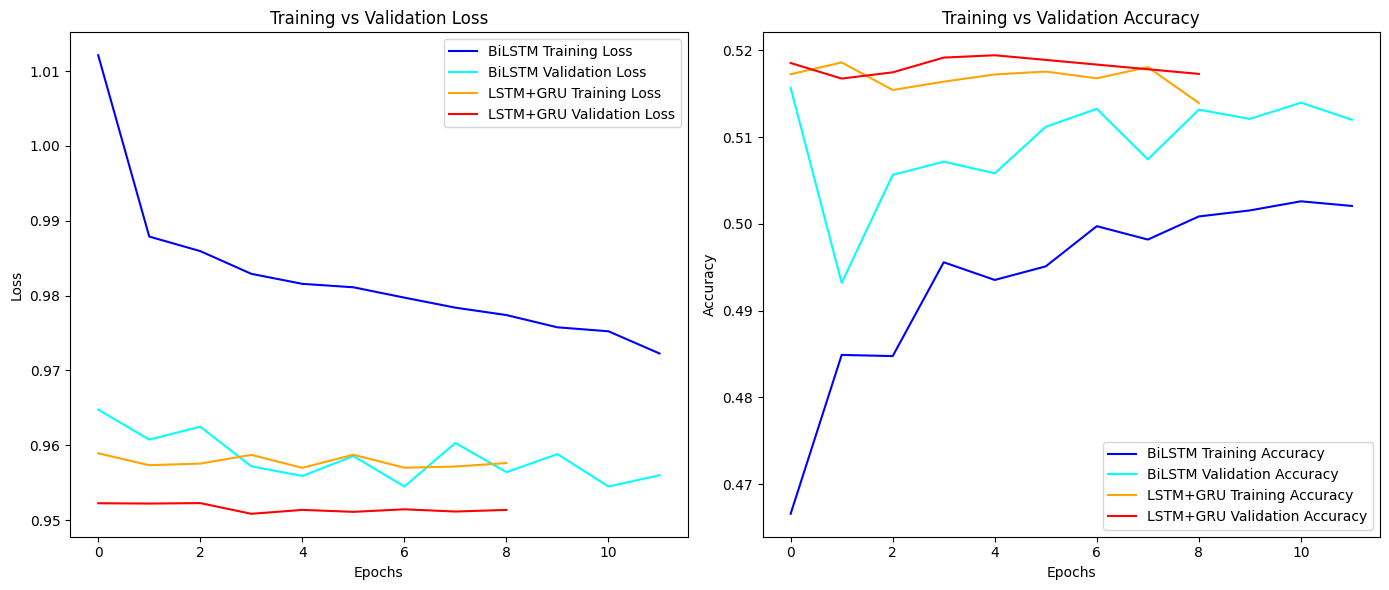

In [17]:
import matplotlib.pyplot as plt

# Define the Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
bilstm_model.add(Bidirectional(LSTM(units=64, dropout=0.3, recurrent_dropout=0.3)))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(units=64, activation='relu'))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(units=num_classes, activation='softmax'))

bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train Bidirectional LSTM model
history_bilstm = bilstm_model.fit(
    X_train, y_train_encoded,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Train LSTM + GRU model (defined in the previous cell)
history_lstm_gru = model.fit(
    X_train, y_train_encoded,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Plot comparison of loss and accuracy
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss', color='blue')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss', color='cyan')
plt.plot(history_lstm_gru.history['loss'], label='LSTM+GRU Training Loss', color='orange')
plt.plot(history_lstm_gru.history['val_loss'], label='LSTM+GRU Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'], label='BiLSTM Training Accuracy', color='blue')
plt.plot(history_bilstm.history['val_accuracy'], label='BiLSTM Validation Accuracy', color='cyan')
plt.plot(history_lstm_gru.history['accuracy'], label='LSTM+GRU Training Accuracy', color='orange')
plt.plot(history_lstm_gru.history['val_accuracy'], label='LSTM+GRU Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the LSTM + GRU model
model = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second GRU layer
model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Updated max_length based on the training sequence length
max_length = 100  # Assuming the model was trained with 100-length sequences

# Define a function to preprocess and predict sentiment for a given model
def predict_sentiment(model, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Predict using the specified model
    prediction = model.predict(text_padded)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label




Epoch 1/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4390 - loss: 1.0369 - val_accuracy: 0.5120 - val_loss: 0.9758 - learning_rate: 0.0010
Epoch 2/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4868 - loss: 0.9937 - val_accuracy: 0.5087 - val_loss: 0.9674 - learning_rate: 0.0010
Epoch 3/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4900 - loss: 0.9888 - val_accuracy: 0.5079 - val_loss: 0.9639 - learning_rate: 0.0010
Epoch 4/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4918 - loss: 0.9867 - val_accuracy: 0.5114 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 5/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4945 - loss: 0.9833 - val_accuracy: 0.5043 - val_loss: 0.9609 - learning_rate: 0.0010
Epoch 6/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4986 - loss: 0.9796 - val_accuracy: 0.5076 - val_loss: 0.9602 - learning_rate: 0.0010
Epoch 7/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5023 - loss: 0.9753 - 

In [19]:
# Example usage: Test the models on random input text
random_text = "The service was excellent and I am extremely happy with my experience!"

# Predict using BiLSTM model
bilstm_sentiment = predict_sentiment(bilstm_model, tokenizer, random_text, label_encoder, max_length)
print(f"BiLSTM Model Predicted Sentiment: {bilstm_sentiment}")

# Predict using LSTM+GRU model
lstm_gru_sentiment = predict_sentiment(model, tokenizer, random_text, label_encoder, max_length)
print(f"LSTM+GRU Model Predicted Sentiment: {lstm_gru_sentiment}")

NameError: name 'label_encoder' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the LSTM + GRU model
model = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second GRU layer
model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Updated max_length based on the training sequence length
max_length = 100  # Assuming the model was trained with 100-length sequences

# Define a function to preprocess and predict sentiment for a given model
def predict_sentiment(model, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Reshape the input to match the expected shape for the model
    text_padded = np.reshape(text_padded, (text_padded.shape[0], 1, text_padded.shape[1]))  # Shape: (1, 1, 100)
    
    # Predict using the specified model
    prediction = model.predict(text_padded)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label

# Example usage: Test the models on random input text
random_text = "The service was excellent and I am extremely happy with my experience!"

# Predict using BiLSTM model
#bilstm_sentiment = predict_sentiment(bilstm_model, tokenizer, random_text, label_encoder, max_length)
#print(f"BiLSTM Model Predicted Sentiment: {bilstm_sentiment}")

# Predict using LSTM+GRU model
lstm_gru_sentiment = predict_sentiment(model, tokenizer, random_text, label_encoder, max_length)
print(f"LSTM+GRU Model Predicted Sentiment: {lstm_gru_sentiment}")

Epoch 1/30


e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4380 - loss: 1.0391 - val_accuracy: 0.5063 - val_loss: 0.9828 - learning_rate: 0.0010
Epoch 2/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4817 - loss: 0.9929 - val_accuracy: 0.5116 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 3/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4940 - loss: 0.9875 - val_accuracy: 0.5143 - val_loss: 0.9588 - learning_rate: 0.0010
Epoch 4/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4952 - loss: 0.9885 - val_accuracy: 0.5081 - val_loss: 0.9593 - learning_rate: 0.0010
Epoch 5/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4976 - loss: 0.9823 - val_accuracy: 0.5064 - val_loss: 0.9632 - learning_rate: 0.0010
Epoch 6/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5015 - loss: 0.9809 - val_accuracy: 0.5084 - val_loss: 0.9596 - learning_rate: 0.0010
Epoch 7/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5006 - loss: 0.9792 - val_accura

NameError: name 'label_encoder' is not defined

In [37]:
# Example usage: Test the models on random input text
random_text = "The service was excellent and I am extremely happy with my experience!"

# Predict using BiLSTM model
#bilstm_sentiment = predict_sentiment(bilstm_model, tokenizer, random_text, label_encoder, max_length)
#print(f"BiLSTM Model Predicted Sentiment: {bilstm_sentiment}")

# Predict using LSTM+GRU model
lstm_gru_sentiment = predict_sentiment(model, tokenizer, random_text, label_encoder, max_length)
print(f"LSTM+GRU Model Predicted Sentiment: {lstm_gru_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training labels (before training the model)
label_encoder.fit(y_train)  # Use the raw labels, not the encoded ones

# Define the LSTM + GRU model
model = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second GRU layer
model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Updated max_length based on the training sequence length
max_length = 100  # Assuming the model was trained with 100-length sequences

# Define a function to preprocess and predict sentiment for a given model
def predict_sentiment(model, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Reshape the input to match the expected shape for the model
    text_padded = np.reshape(text_padded, (text_padded.shape[0], 1, text_padded.shape[1]))  # Shape: (1, 1, 100)
    
    # Predict using the specified model
    prediction = model.predict(text_padded)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label


Epoch 1/30


e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4525 - loss: 1.0280 - val_accuracy: 0.5045 - val_loss: 0.9855 - learning_rate: 0.0010
Epoch 2/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4886 - loss: 0.9922 - val_accuracy: 0.5109 - val_loss: 0.9595 - learning_rate: 0.0010
Epoch 3/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4993 - loss: 0.9816 - val_accuracy: 0.5099 - val_loss: 0.9594 - learning_rate: 0.0010
Epoch 4/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4993 - loss: 0.9813 - val_accuracy: 0.5085 - val_loss: 0.9621 - learning_rate: 0.0010
Epoch 5/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5002 - loss: 0.9812 - val_accuracy: 0.5073 - val_loss: 0.9613 - learning_rate: 0.0010
Epoch 6/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5029 - loss: 0.9756 - val_accuracy: 0.5016 - val_loss: 0.9640 - learning_rate: 0.0010
Epoch 7/30
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5038 - loss: 0.9765 - val_accurac

In [24]:
model.save('sentiment_model_1.h5')

In [25]:
import pickle
# Export the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [39]:
# Example usage: Test the models on random input text
random_text = "The service was excellent and I am extremely happy with my experience!"

# Predict using BiLSTM model
#bilstm_sentiment = predict_sentiment(bilstm_model, tokenizer, random_text, label_encoder, max_length)
#print(f"BiLSTM Model Predicted Sentiment: {bilstm_sentiment}")

# Predict using LSTM+GRU model
lstm_gru_sentiment = predict_sentiment(model, tokenizer, random_text, label_encoder, max_length)
print(f"LSTM+GRU Model Predicted Sentiment: {lstm_gru_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
LSTM+GRU Model Predicted Sentiment: 2


In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [21]:
def predict_sentiment(model, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    import numpy as np
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Reshape the padded input to add the third dimension (features = 1)
    text_reshaped = np.expand_dims(text_padded, axis=-1)  # Add 3rd dimension
    
    # Predict using the specified model
    prediction = model.predict(text_reshaped)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label


In [22]:
random_text = "This product is amazing! I loved it."
max_length = 100  # Replace with the actual max_length used during training

# Predict using BiLSTM model
bilstm_sentiment = predict_sentiment(bilstm_model, tokenizer, random_text, label_encoder, max_length)
print(f"BiLSTM Model Predicted Sentiment: {bilstm_sentiment}")

# Predict using LSTM+GRU model
lstm_gru_sentiment = predict_sentiment(model, tokenizer, random_text, label_encoder, max_length)
print(f"LSTM+GRU Model Predicted Sentiment: {lstm_gru_sentiment}")


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 1 and 100 for '{{node sequential_3_1/bidirectional_4_1/forward_lstm_4_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_3_1/bidirectional_4_1/forward_lstm_4_1/strided_slice_1, sequential_3_1/bidirectional_4_1/forward_lstm_4_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [1,1], [100,512].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(1, 1), dtype=float32)
  • states=('tf.Tensor(shape=(1, 128), dtype=float32)', 'tf.Tensor(shape=(1, 128), dtype=float32)')
  • training=False